In [ ]:
import numpy as np
import math

import random


UNCLASSIFIED = False
NOISE = None

In [ ]:
def _dist(p,q):
    return math.sqrt(np.power(p-q,2).sum())

In [ ]:
data = np.random.randint(low=0, high=6, size=(2,20))
#  data = np.matrix('1 1.2 0.8 3.7 3.9 3.6 10; 1.1 0.8 1 4 3.9 4.1 10')

In [ ]:
data

array([[0, 2, 5, 1, 0, 5, 0, 1, 0, 3, 3, 0, 1, 1, 3, 0, 5, 3, 1, 1],
       [0, 1, 2, 0, 3, 3, 2, 0, 5, 3, 3, 3, 0, 3, 4, 0, 3, 3, 4, 5]])

In [ ]:
# accessing single data point
data[:,0]

array([0, 0])

In [ ]:
np.zeros((20),dtype=bool)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [ ]:
def core_point(distances,cluster,neighbours,core,id,eps,min_points,i,classify):
    count = 0
    for z in range(0,len(distances)):

      if distances[z]< eps:

          count=count+1

          if z+1 not in neighbours:
            neighbours.append(z+1)



    if count >= min_points:

      core.append(i)
      
      if id not in cluster.keys() and classify[i]==False:

        cluster[id]=[i]
        classify[i]=True

      elif classify[i]==False:
        classify[i]=True
        cluster[id].append(i)





    
def dbscan(data, eps, min_points):
    # Data is the 2D array as shown above eps =0.5 min_points=2
    # initiliaze the cluster id = 1
    # Define a boolean array named classification = size of the data i.e 20
    #for point in data:
    #  if point is unclassified:
    #    find whether the point is a core point,border point or noise
    #    if point is noise set hte classification Array value=NOISE

  core=[]

  X= data[0]
  Y= data[1]

  cluster={}

  id=1

  classify=np.zeros((20),dtype=bool)

  for i in range(0,len(X)):




        point= np.array([X[i],Y[i]])

        #classify[i]=True

      #print(point)

        distances = []
        for j in range(i+1,len(X)):
            
            point2 = np.array([X[j],Y[j]])
            
            distances.append(_dist(point,point2) )
            #print(data[i][i])

        
        

        neighbours=[]

        core_point(distances,cluster,neighbours,core,id,eps,min_points,i,classify)    

        for k in neighbours:
          
          

          p1=data[:,k]
          d=[]
          for z in range(0,20):

                  if z!= k:

                    p2=data[:,z]

                    d.append(_dist(p1,p2))

          count = 0

          for z in range(0,len(d)):

            if d[z]< eps:

                count=count+1

                if z+1 not in neighbours:
                
                      neighbours.append(z+1)


          if count >= min_points:

            core.append(k)
            
          if id not in cluster.keys() and classify[k]== False:

              cluster[id]=[k]
              classify[k]=True

          elif classify[k]== False:
              classify[k]=True
              cluster[id].append(k)

        id=id+1


      #core_point(distances,cluster,neighbours,core,id,eps,min_points,i)   

      




  print(cluster)
  

dbscan(data,0.5,2)




{1: [15, 1], 4: [3, 4, 9, 11, 10, 17, 5, 16, 6], 5: [7, 12, 8]}


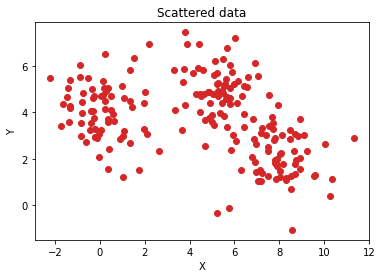

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

centers = [(0, 4), (5, 5) , (8,2)]
cluster_std = [1.2, 1, 1.1]

X, y= make_blobs(n_samples=200, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=10, label="Cluster3")
plt.title("Scattered data")
plt.xlabel('X')
plt.ylabel('Y')



plt.scatter(X[:,0],X[:,1])



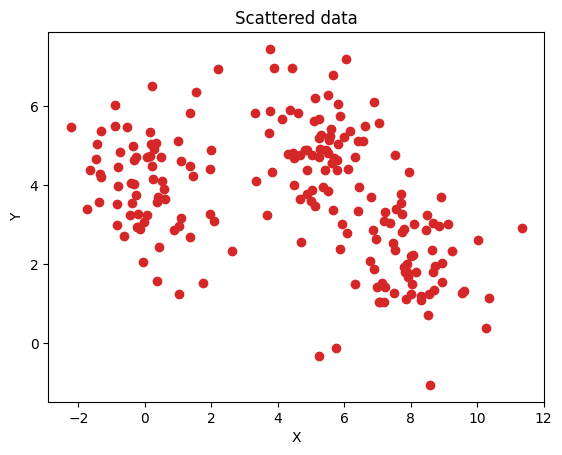

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

centers = [(0, 4), (5, 5) , (8,2)]
cluster_std = [1.2, 1, 1.1]

X, y= make_blobs(n_samples=200, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=11, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=12, label="Cluster3")
plt.title("Scattered data")
plt.xlabel('X')
plt.ylabel('Y')



plt.scatter(X[:,0],X[:,1])

In [ ]:
def check_core_point(eps,minPts, df, index):
    #get points from given index
    x, y = df.iloc[index]['X']  ,  df.iloc[index]['Y']
    
    #check available points within radius
    temp =  df[((np.abs(x - df['X']) <= eps) & (np.abs(y - df['Y']) <= eps)) & (df.index != index)]
    
    #check how many points are present within radius
    if len(temp) >= minPts:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , True, False, False)
    
    elif (len(temp) < minPts) and len(temp) > 0:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , False, True, False)
    
    elif len(temp) == 0:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , False, False, True)


In [ ]:
def cluster_with_stack(eps, minPts, df):
    
    #initiating cluster number
    C = 1
    #initiating stacks to maintain
    current_stack = set()
    unvisited = list(df.index)
    clusters = []
    
    
    while (len(unvisited) != 0): #run until all points have been visited

        #identifier for first point of a cluster
        first_point = True
        
        #choose a random unvisited point
        current_stack.add(random.choice(unvisited))
        
        while len(current_stack) != 0: #run until a cluster is complete
            
            #pop current point from stack
            curr_idx = current_stack.pop()
            
            #check if point is core, neighbour or border
            neigh_indexes, iscore, isborder, isnoise = check_core_point(eps, minPts, df, curr_idx)
            
            #dealing with an edge case
            if (isborder & first_point):
                #for first border point, we label it aand its neighbours as noise 
                clusters.append((curr_idx, 0))
                clusters.extend(list(zip(neigh_indexes,[0 for _ in range(len(neigh_indexes))])))
                
                #label as visited
                unvisited.remove(curr_idx)
                unvisited = [e for e in unvisited if e not in neigh_indexes]
    
                continue
                
            unvisited.remove(curr_idx) #remove point from unvisited list
            
            
            neigh_indexes = set(neigh_indexes) & set(unvisited) #look at only unvisited points
            
            if iscore: #if current point is a core
                first_point = False
                
                clusters.append((curr_idx,C)) #assign to a cluster
                current_stack.update(neigh_indexes) #add neighbours to a stack

            elif isborder: #if current point is a border point
                clusters.append((curr_idx,C))
                
                continue

            elif isnoise: #if current point is noise
                clusters.append((curr_idx, 0))
                
                continue
                
        if not first_point:
            #increment cluster number
            C+=1
        
    return clusters
            

In [ ]:


#radius of the circle defined as 0.6
eps = 0.6
#minimum neighbouring points set to 3
minPts = 3



In [ ]:


data = pd.DataFrame(X, columns = ["X", "Y"] )
clustered = cluster_with_stack(eps, minPts, data)



In [ ]:
clustered

[(171, 1),
 (100, 1),
 (5, 1),
 (8, 1),
 (136, 1),
 (139, 1),
 (140, 1),
 (142, 1),
 (89, 1),
 (155, 1),
 (91, 1),
 (158, 1),
 (37, 1),
 (42, 1),
 (177, 1),
 (49, 1),
 (181, 1),
 (182, 1),
 (55, 1),
 (56, 1),
 (183, 1),
 (58, 1),
 (61, 1),
 (68, 1),
 (197, 1),
 (70, 1),
 (72, 1),
 (74, 1),
 (76, 1),
 (79, 1),
 (87, 1),
 (95, 1),
 (106, 1),
 (112, 1),
 (113, 1),
 (116, 1),
 (117, 1),
 (121, 1),
 (124, 1),
 (127, 1),
 (129, 1),
 (2, 1),
 (130, 1),
 (134, 1),
 (11, 1),
 (12, 1),
 (14, 1),
 (16, 1),
 (18, 1),
 (19, 1),
 (31, 1),
 (166, 1),
 (39, 1),
 (41, 1),
 (175, 1),
 (176, 1),
 (179, 1),
 (54, 1),
 (187, 1),
 (66, 1),
 (198, 1),
 (71, 1),
 (80, 1),
 (82, 1),
 (92, 1),
 (114, 1),
 (122, 1),
 (1, 1),
 (131, 1),
 (4, 1),
 (147, 1),
 (86, 1),
 (30, 1),
 (159, 1),
 (163, 1),
 (164, 1),
 (44, 1),
 (172, 1),
 (52, 1),
 (180, 1),
 (59, 1),
 (62, 1),
 (63, 1),
 (190, 1),
 (191, 1),
 (194, 1),
 (69, 1),
 (199, 1),
 (75, 1),
 (90, 1),
 (94, 1),
 (97, 1),
 (108, 1),
 (109, 1),
 (110, 1),
 (111, 1)